# Regional plot

## load gwaslab

In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl

## download sample data

In [2]:
#!wget -O t2d_bbj.txt.gz http://jenger.riken.jp/14/

## load sumstats into gwaslab.Sumstats

In [3]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             build="19",
             n="N")
mysumstats.filter_value('CHR =="7"',inplace=True)
mysumstats.basic_check(verbose = False)

Fri Feb  2 17:20:48 2024 GWASLab v3.4.38 https://cloufield.github.io/gwaslab/
Fri Feb  2 17:20:48 2024 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
Fri Feb  2 17:20:48 2024 Start to initialize gl.Sumstats from file :t2d_bbj.txt.gz
Fri Feb  2 17:21:03 2024  -Reading columns          : SE,Dir,ALT,REF,POS,SNP,CHR,Frq,BETA,P,N
Fri Feb  2 17:21:03 2024  -Renaming columns to      : SE,DIRECTION,EA,NEA,POS,SNPID,CHR,EAF,BETA,P,N
Fri Feb  2 17:21:03 2024  -Current Dataframe shape : 12557761  x  11
Fri Feb  2 17:21:04 2024  -Initiating a status column: STATUS ...
Fri Feb  2 17:21:04 2024  -Genomic coordinates are based on GRCh37/hg19...
Fri Feb  2 17:21:05 2024  -NEAF is specified...
Fri Feb  2 17:21:05 2024  -Checking if 0<= NEAF <=1 ...
Fri Feb  2 17:21:06 2024  -Converted NEAF to EAF.
Fri Feb  2 17:21:06 2024  -Removed 0 variants with bad NEAF.
Fri Feb  2 17:21:06 2024 Start to reorder the columns...v3.4.38
Fri Feb  2 17:21:06 2024  -Current Dataframe shape : 1255776

## Create Manhattan plot with sumstats on a single chromosome

Fri Feb  2 17:21:14 2024 Start to create MQQ plot...v3.4.38:
Fri Feb  2 17:21:14 2024  -Genomic coordinates version: 19...
Fri Feb  2 17:21:14 2024  -Genome-wide significance level to plot is set to 5e-08 ...
Fri Feb  2 17:21:14 2024  -Raw input contains 707780 variants...
Fri Feb  2 17:21:14 2024  -MQQ plot layout mode is : m
Fri Feb  2 17:21:14 2024 Finished loading specified columns from the sumstats.
Fri Feb  2 17:21:14 2024 Start data conversion and sanity check:
Fri Feb  2 17:21:14 2024  -Removed 0 variants with nan in CHR or POS column ...
Fri Feb  2 17:21:14 2024  -Removed 0 variants with CHR <=0...
Fri Feb  2 17:21:14 2024  -Removed 0 variants with nan in P column ...
Fri Feb  2 17:21:14 2024  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Feb  2 17:21:14 2024  -Sumstats P values are being converted to -log10(P)...
Fri Feb  2 17:21:14 2024  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Feb  2 17:21:14 2024  -Conve

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7fd43c674190>)

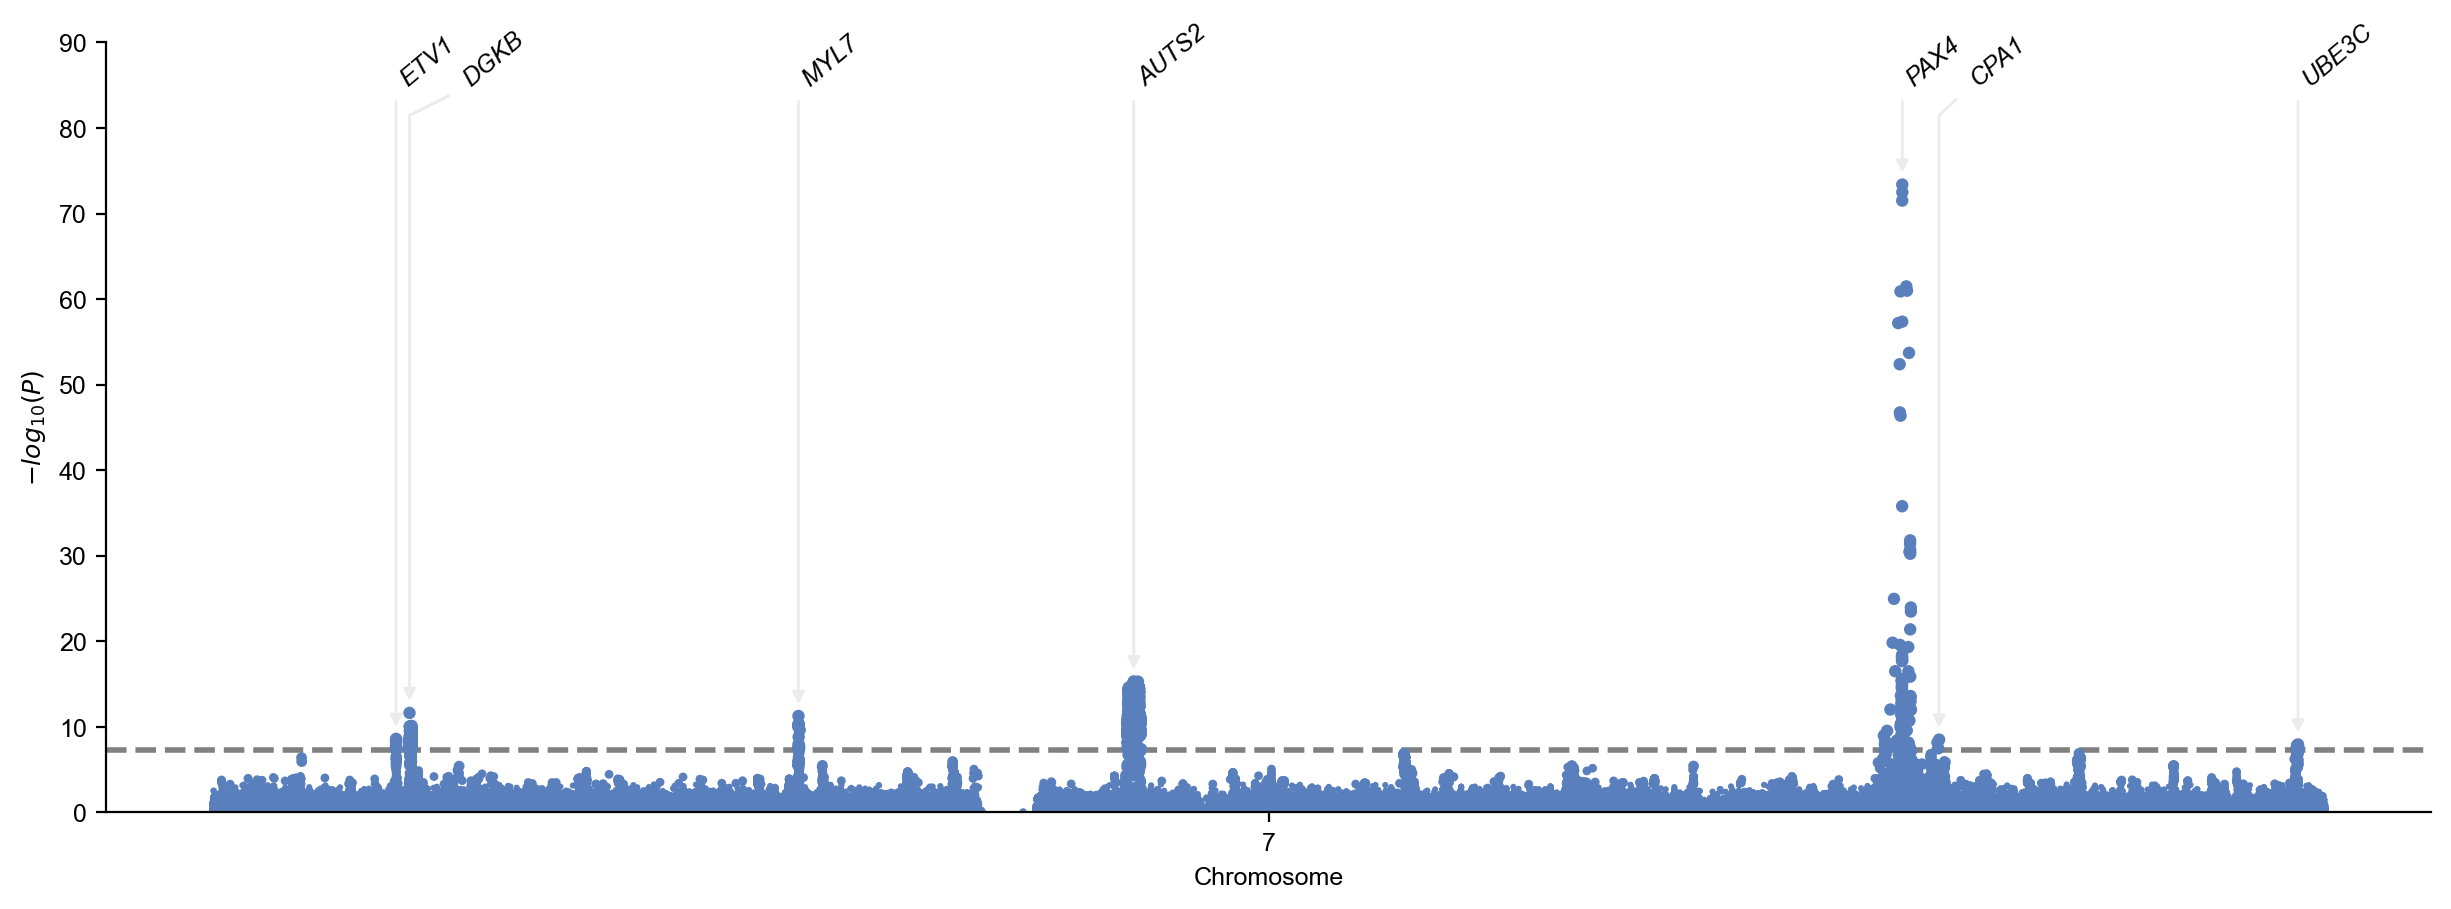

In [4]:
mysumstats.plot_mqq(mode="m",anno="GENENAME",anno_source="ensembl")

## Check lead variants

In [5]:
mysumstats.get_lead()

Fri Feb  2 17:21:20 2024 Start to extract lead variants...v3.4.38
Fri Feb  2 17:21:20 2024  -Current Dataframe shape : 707780 x 12 ; Memory usage: 73.87 MB
Fri Feb  2 17:21:20 2024  -Processing 707780 variants...
Fri Feb  2 17:21:20 2024  -Significance threshold : 5e-08
Fri Feb  2 17:21:20 2024  -Sliding window size: 500  kb
Fri Feb  2 17:21:20 2024  -Using P for extracting lead variants...
Fri Feb  2 17:21:20 2024  -Found 1077 significant variants in total...
Fri Feb  2 17:21:20 2024  -Identified 7 lead variants!
Fri Feb  2 17:21:20 2024 Finished extracting lead variants.


SNPID  CHR        POS EA NEA     EAF    BETA      SE  \
77576    7:13888699_G_C    7   13888699  G   C  0.5680  0.0562  0.0094   
83154    7:14898282_C_T    7   14898282  C   T  0.6012  0.0617  0.0088   
229433   7:44174857_T_G    7   44174857  G   T  0.5985 -0.0640  0.0093   
335366   7:69406661_A_T    7   69406661  T   A  0.1981 -0.0900  0.0111   
568451  7:127253550_C_T    7  127253550  C   T  0.9081  0.2761  0.0152   
579917  7:130025713_G_A    7  130025713  G   A  0.9530 -0.1365  0.0230   
695434  7:157038803_A_G    7  157038803  G   A  0.4626 -0.0502  0.0088   

                   P       N DIRECTION   STATUS  
77576   2.507000e-09  191764      ++++  1960099  
83154   2.336000e-12  191764      ++++  1960099  
229433  5.325000e-12  191764      ----  1960099  
335366  4.871000e-16  191764      ----  1960099  
568451  4.101000e-74  191764      ++++  1960099  
579917  3.068000e-09  191764      ----  1960099  
695434  1.127000e-08  191764      ----  1960099

## Create a regional plot with no additional information

Fri Feb  2 17:21:20 2024 Start to create MQQ plot...v3.4.38:
Fri Feb  2 17:21:20 2024  -Genomic coordinates version: 19...
Fri Feb  2 17:21:20 2024  -Genome-wide significance level to plot is set to 5e-08 ...
Fri Feb  2 17:21:20 2024  -Raw input contains 707780 variants...
Fri Feb  2 17:21:20 2024  -MQQ plot layout mode is : mqq
Fri Feb  2 17:21:20 2024  -Region to plot : chr7:156538803-157538803.
Fri Feb  2 17:21:20 2024  -Extract SNPs in region : chr7:156538803-157538803...
Fri Feb  2 17:21:20 2024  -Extract SNPs in specified regions: 5831
Fri Feb  2 17:21:20 2024 Finished loading specified columns from the sumstats.
Fri Feb  2 17:21:20 2024 Start data conversion and sanity check:
Fri Feb  2 17:21:20 2024  -Removed 0 variants with nan in CHR or POS column ...
Fri Feb  2 17:21:20 2024  -Removed 0 variants with CHR <=0...
Fri Feb  2 17:21:20 2024  -Removed 0 variants with nan in P column ...
Fri Feb  2 17:21:20 2024  -Sanity check after conversion: 0 variants with P value outside of (0

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7fd43c674190>)

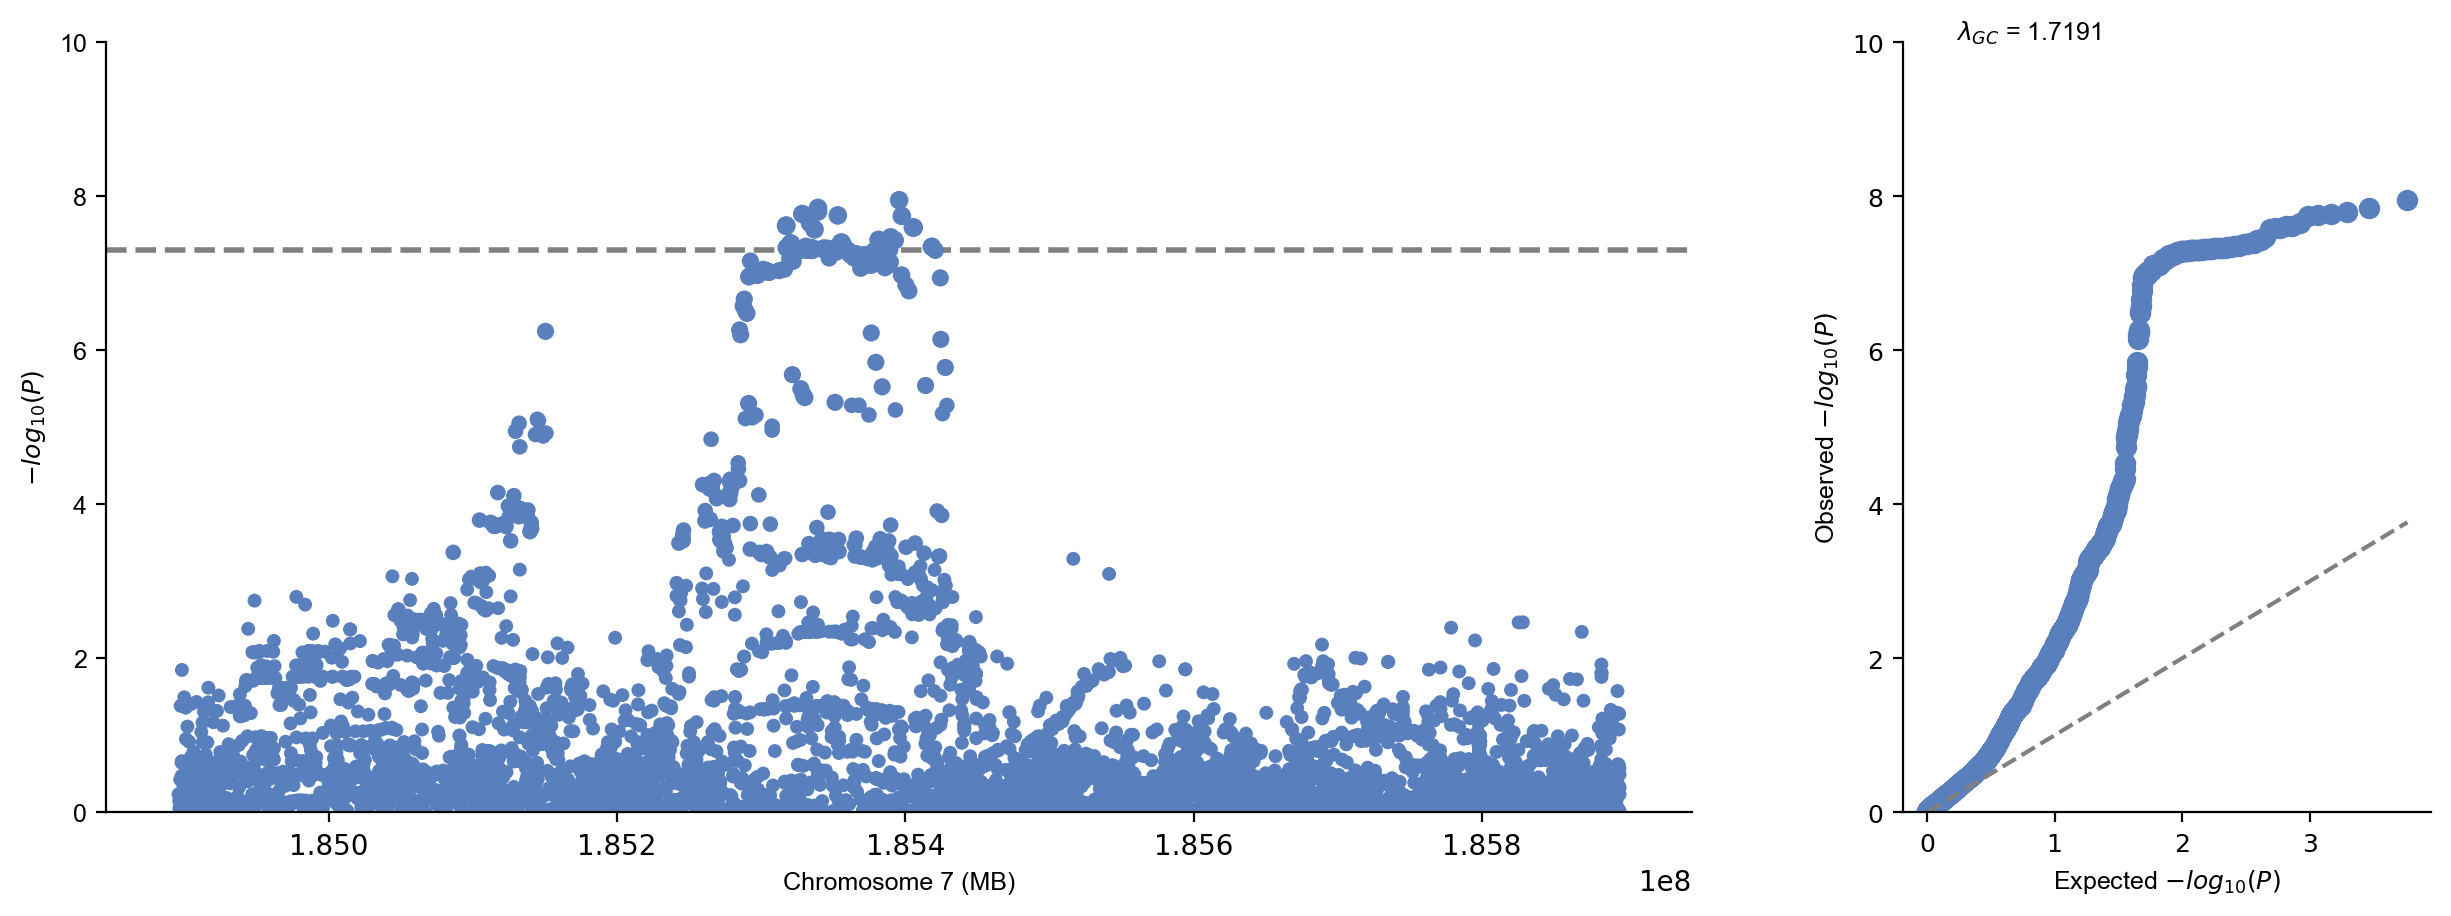

In [6]:
mysumstats.plot_mqq(region=(7,156538803,157538803))

## Create a regional plot with gene track

Fri Feb  2 17:21:21 2024 Start to create MQQ plot...v3.4.38:
Fri Feb  2 17:21:21 2024  -Genomic coordinates version: 19...
Fri Feb  2 17:21:21 2024  -Genome-wide significance level to plot is set to 5e-08 ...
Fri Feb  2 17:21:21 2024  -Raw input contains 707780 variants...
Fri Feb  2 17:21:21 2024  -MQQ plot layout mode is : r
Fri Feb  2 17:21:21 2024  -Region to plot : chr7:156538803-157538803.
Fri Feb  2 17:21:21 2024  -Extract SNPs in region : chr7:156538803-157538803...
Fri Feb  2 17:21:21 2024  -Extract SNPs in specified regions: 5831
Fri Feb  2 17:21:21 2024 Finished loading specified columns from the sumstats.
Fri Feb  2 17:21:21 2024 Start data conversion and sanity check:
Fri Feb  2 17:21:21 2024  -Removed 0 variants with nan in CHR or POS column ...
Fri Feb  2 17:21:21 2024  -Removed 0 variants with CHR <=0...
Fri Feb  2 17:21:21 2024  -Removed 0 variants with nan in P column ...
Fri Feb  2 17:21:21 2024  -Sanity check after conversion: 0 variants with P value outside of (0,1

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


Fri Feb  2 17:21:49 2024  -plotting gene track..
Fri Feb  2 17:21:49 2024  -Finished plotting gene track..
Fri Feb  2 17:21:49 2024 Finished creating MQQ plot successfully!
Fri Feb  2 17:21:49 2024 Start to extract variants for annotation...
Fri Feb  2 17:21:50 2024  -Found 1 significant variants with a sliding window size of 500 kb...
Fri Feb  2 17:21:50 2024 Finished extracting variants for annotation...
Fri Feb  2 17:21:50 2024 Start to process figure arts.
Fri Feb  2 17:21:50 2024  -Processing X labels...
Fri Feb  2 17:21:50 2024  -Processing Y labels...
Fri Feb  2 17:21:50 2024  -Processing Y tick lables...
Fri Feb  2 17:21:50 2024  -Processing Y labels...
Fri Feb  2 17:21:50 2024  -Processing lines...
Fri Feb  2 17:21:50 2024 Finished processing figure arts.
Fri Feb  2 17:21:50 2024 Start to annotate variants...
Fri Feb  2 17:21:50 2024  -Skip annotating
Fri Feb  2 17:21:50 2024 Finished annotating variants.
Fri Feb  2 17:21:50 2024 Start to save figure...
Fri Feb  2 17:21:50 202

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.g_Log.Log at 0x7fd43c674190>)

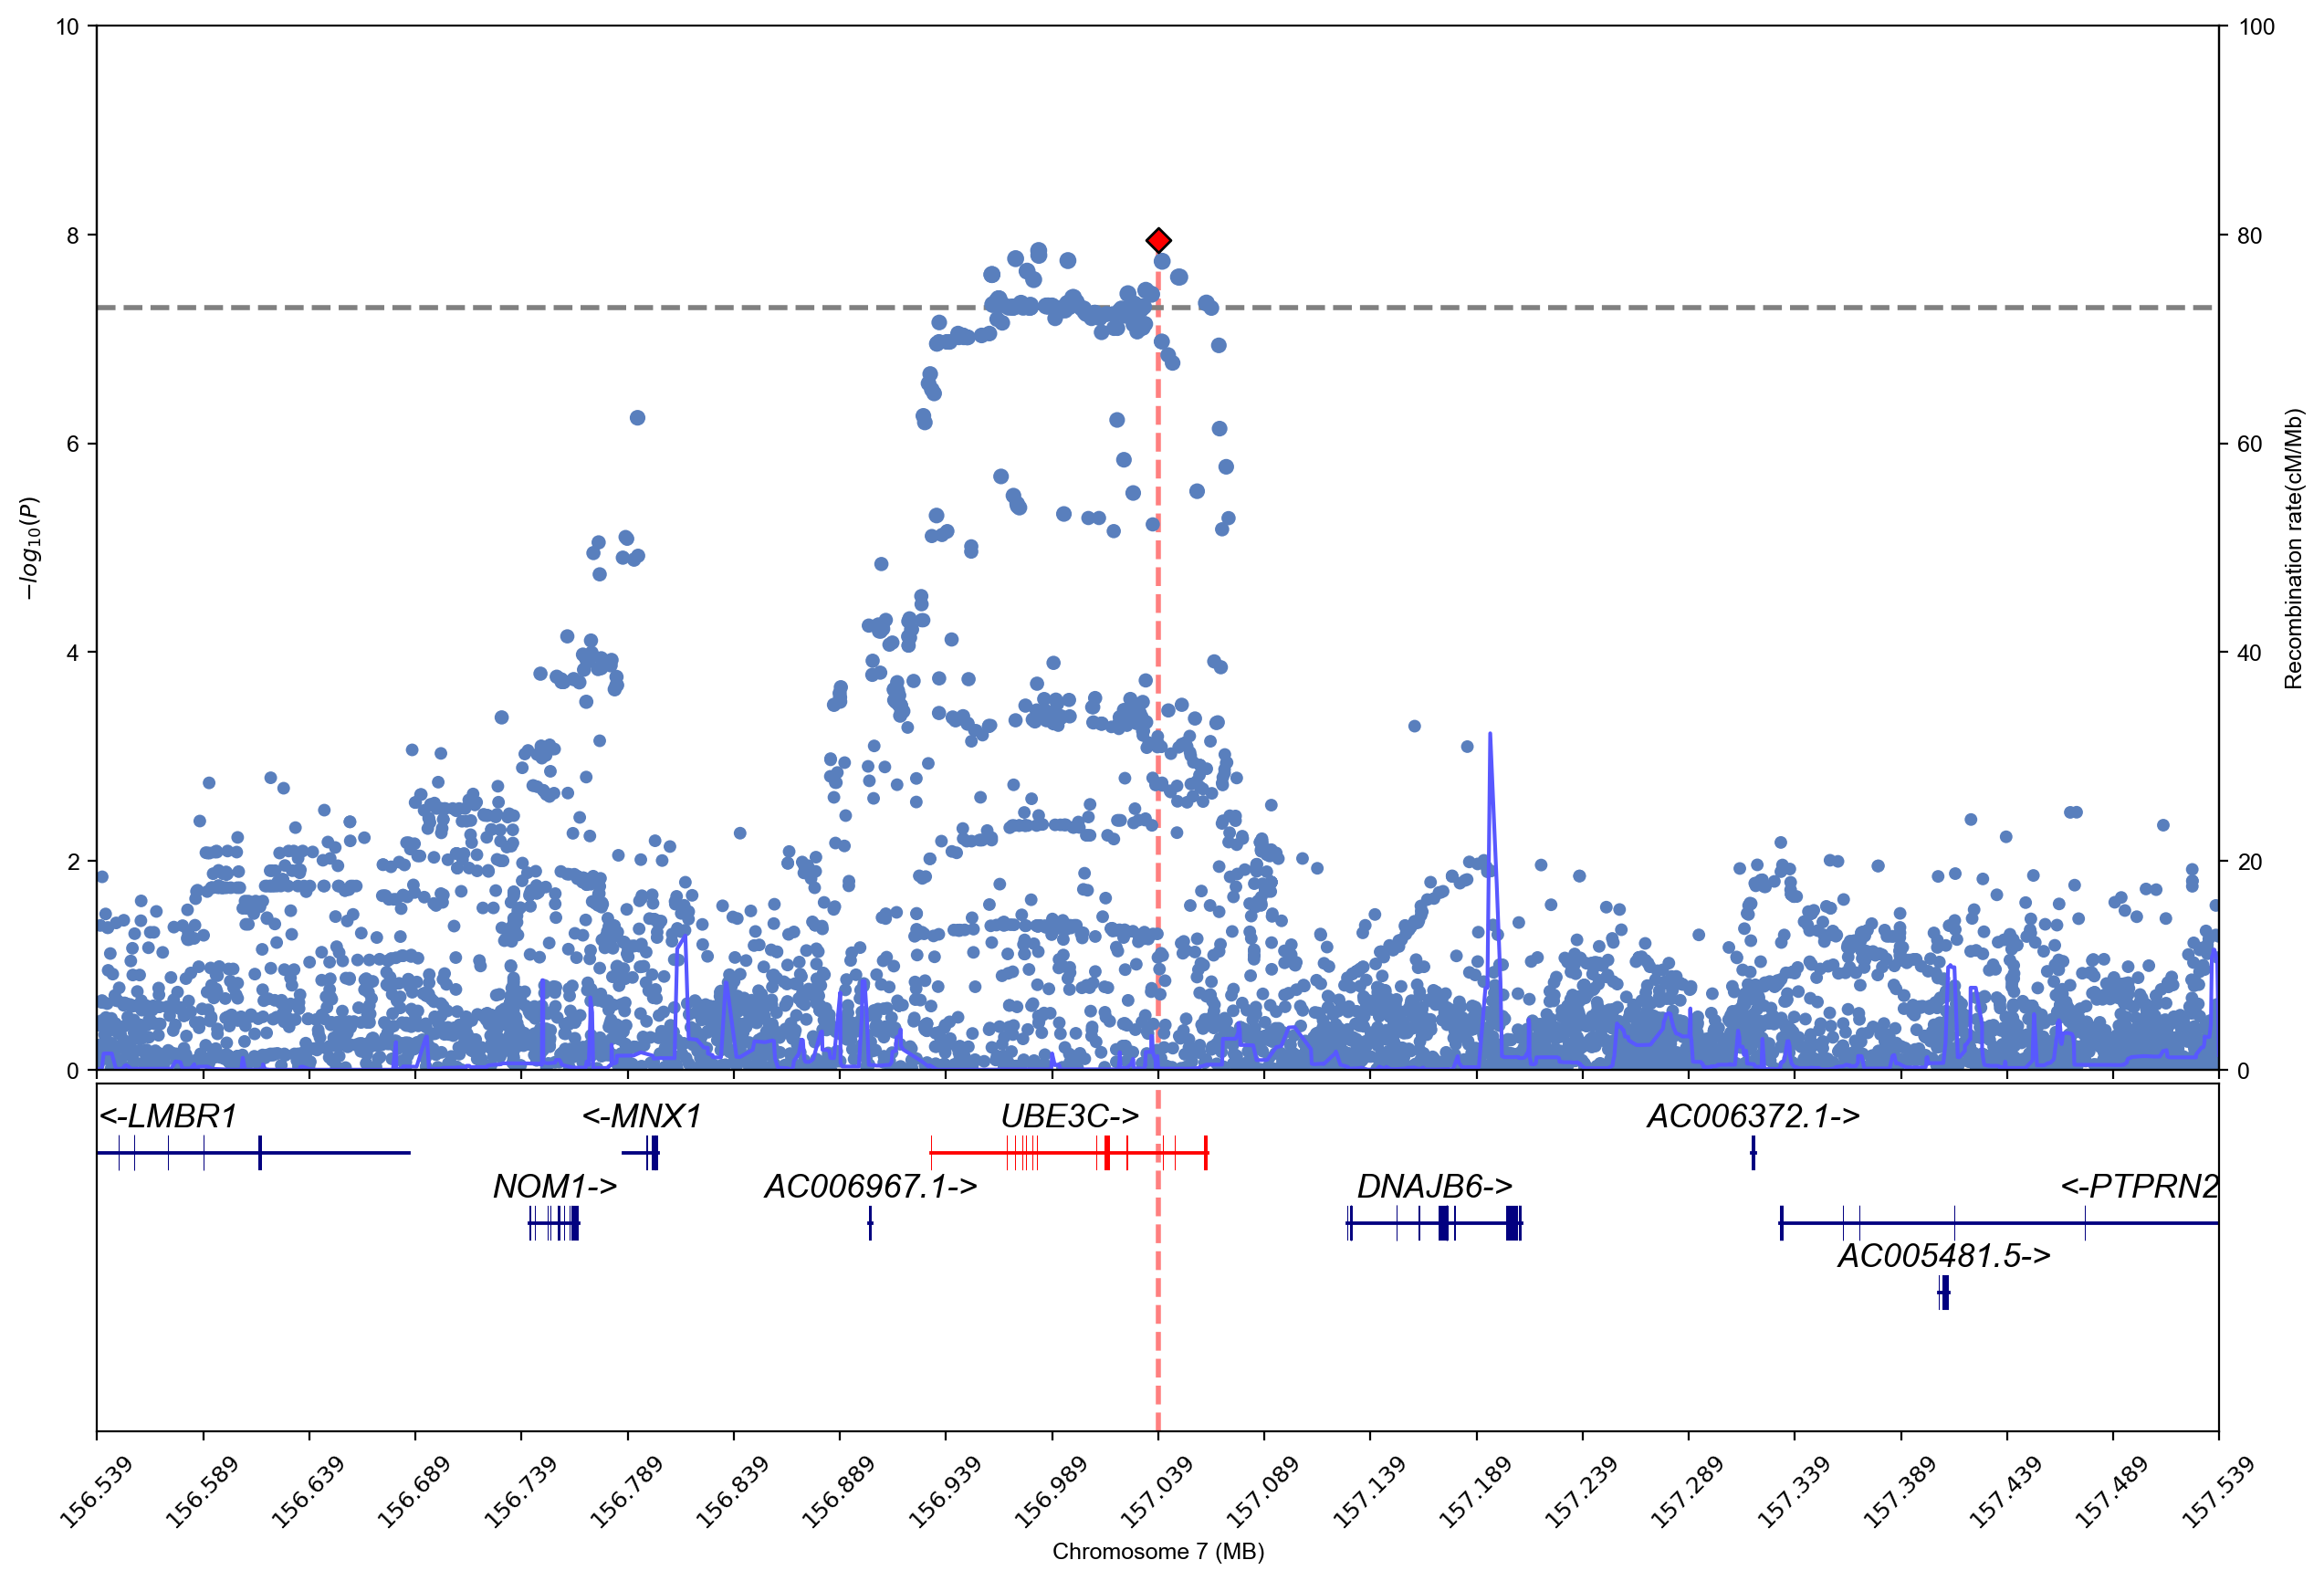

In [7]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803))

## Create regional plot with gene track and LD information

Fri Feb  2 17:21:50 2024 Start to create MQQ plot...v3.4.38:
Fri Feb  2 17:21:50 2024  -Genomic coordinates version: 19...
Fri Feb  2 17:21:50 2024  -Genome-wide significance level to plot is set to 5e-08 ...
Fri Feb  2 17:21:50 2024  -Raw input contains 707780 variants...
Fri Feb  2 17:21:50 2024  -MQQ plot layout mode is : r
Fri Feb  2 17:21:50 2024  -Region to plot : chr7:156538803-157538803.
Fri Feb  2 17:21:50 2024  -Checking prefix for chromosomes in vcf files...
Fri Feb  2 17:21:50 2024  -No prefix for chromosomes in the VCF files.
Fri Feb  2 17:21:50 2024  -Extract SNPs in region : chr7:156538803-157538803...
Fri Feb  2 17:21:50 2024  -Extract SNPs in specified regions: 5831
Fri Feb  2 17:21:50 2024 Finished loading specified columns from the sumstats.
Fri Feb  2 17:21:50 2024 Start data conversion and sanity check:
Fri Feb  2 17:21:50 2024  -Removed 0 variants with nan in CHR or POS column ...
Fri Feb  2 17:21:50 2024  -Removed 0 variants with CHR <=0...
Fri Feb  2 17:21:50 20

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


Fri Feb  2 17:22:21 2024  -plotting gene track..
Fri Feb  2 17:22:21 2024  -Finished plotting gene track..
Fri Feb  2 17:22:21 2024 Finished creating MQQ plot successfully!
Fri Feb  2 17:22:21 2024 Start to extract variants for annotation...
Fri Feb  2 17:22:21 2024  -Found 1 significant variants with a sliding window size of 500 kb...
Fri Feb  2 17:22:21 2024 Finished extracting variants for annotation...
Fri Feb  2 17:22:21 2024 Start to process figure arts.
Fri Feb  2 17:22:21 2024  -Processing X labels...
Fri Feb  2 17:22:21 2024  -Processing Y labels...
Fri Feb  2 17:22:21 2024  -Processing Y tick lables...
Fri Feb  2 17:22:21 2024  -Processing Y labels...
Fri Feb  2 17:22:21 2024  -Processing color bar...
Fri Feb  2 17:22:21 2024  -Processing lines...
Fri Feb  2 17:22:21 2024 Finished processing figure arts.
Fri Feb  2 17:22:21 2024 Start to annotate variants...
Fri Feb  2 17:22:21 2024  -Skip annotating
Fri Feb  2 17:22:21 2024 Finished annotating variants.
Fri Feb  2 17:22:21 2

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7fd43c674190>)

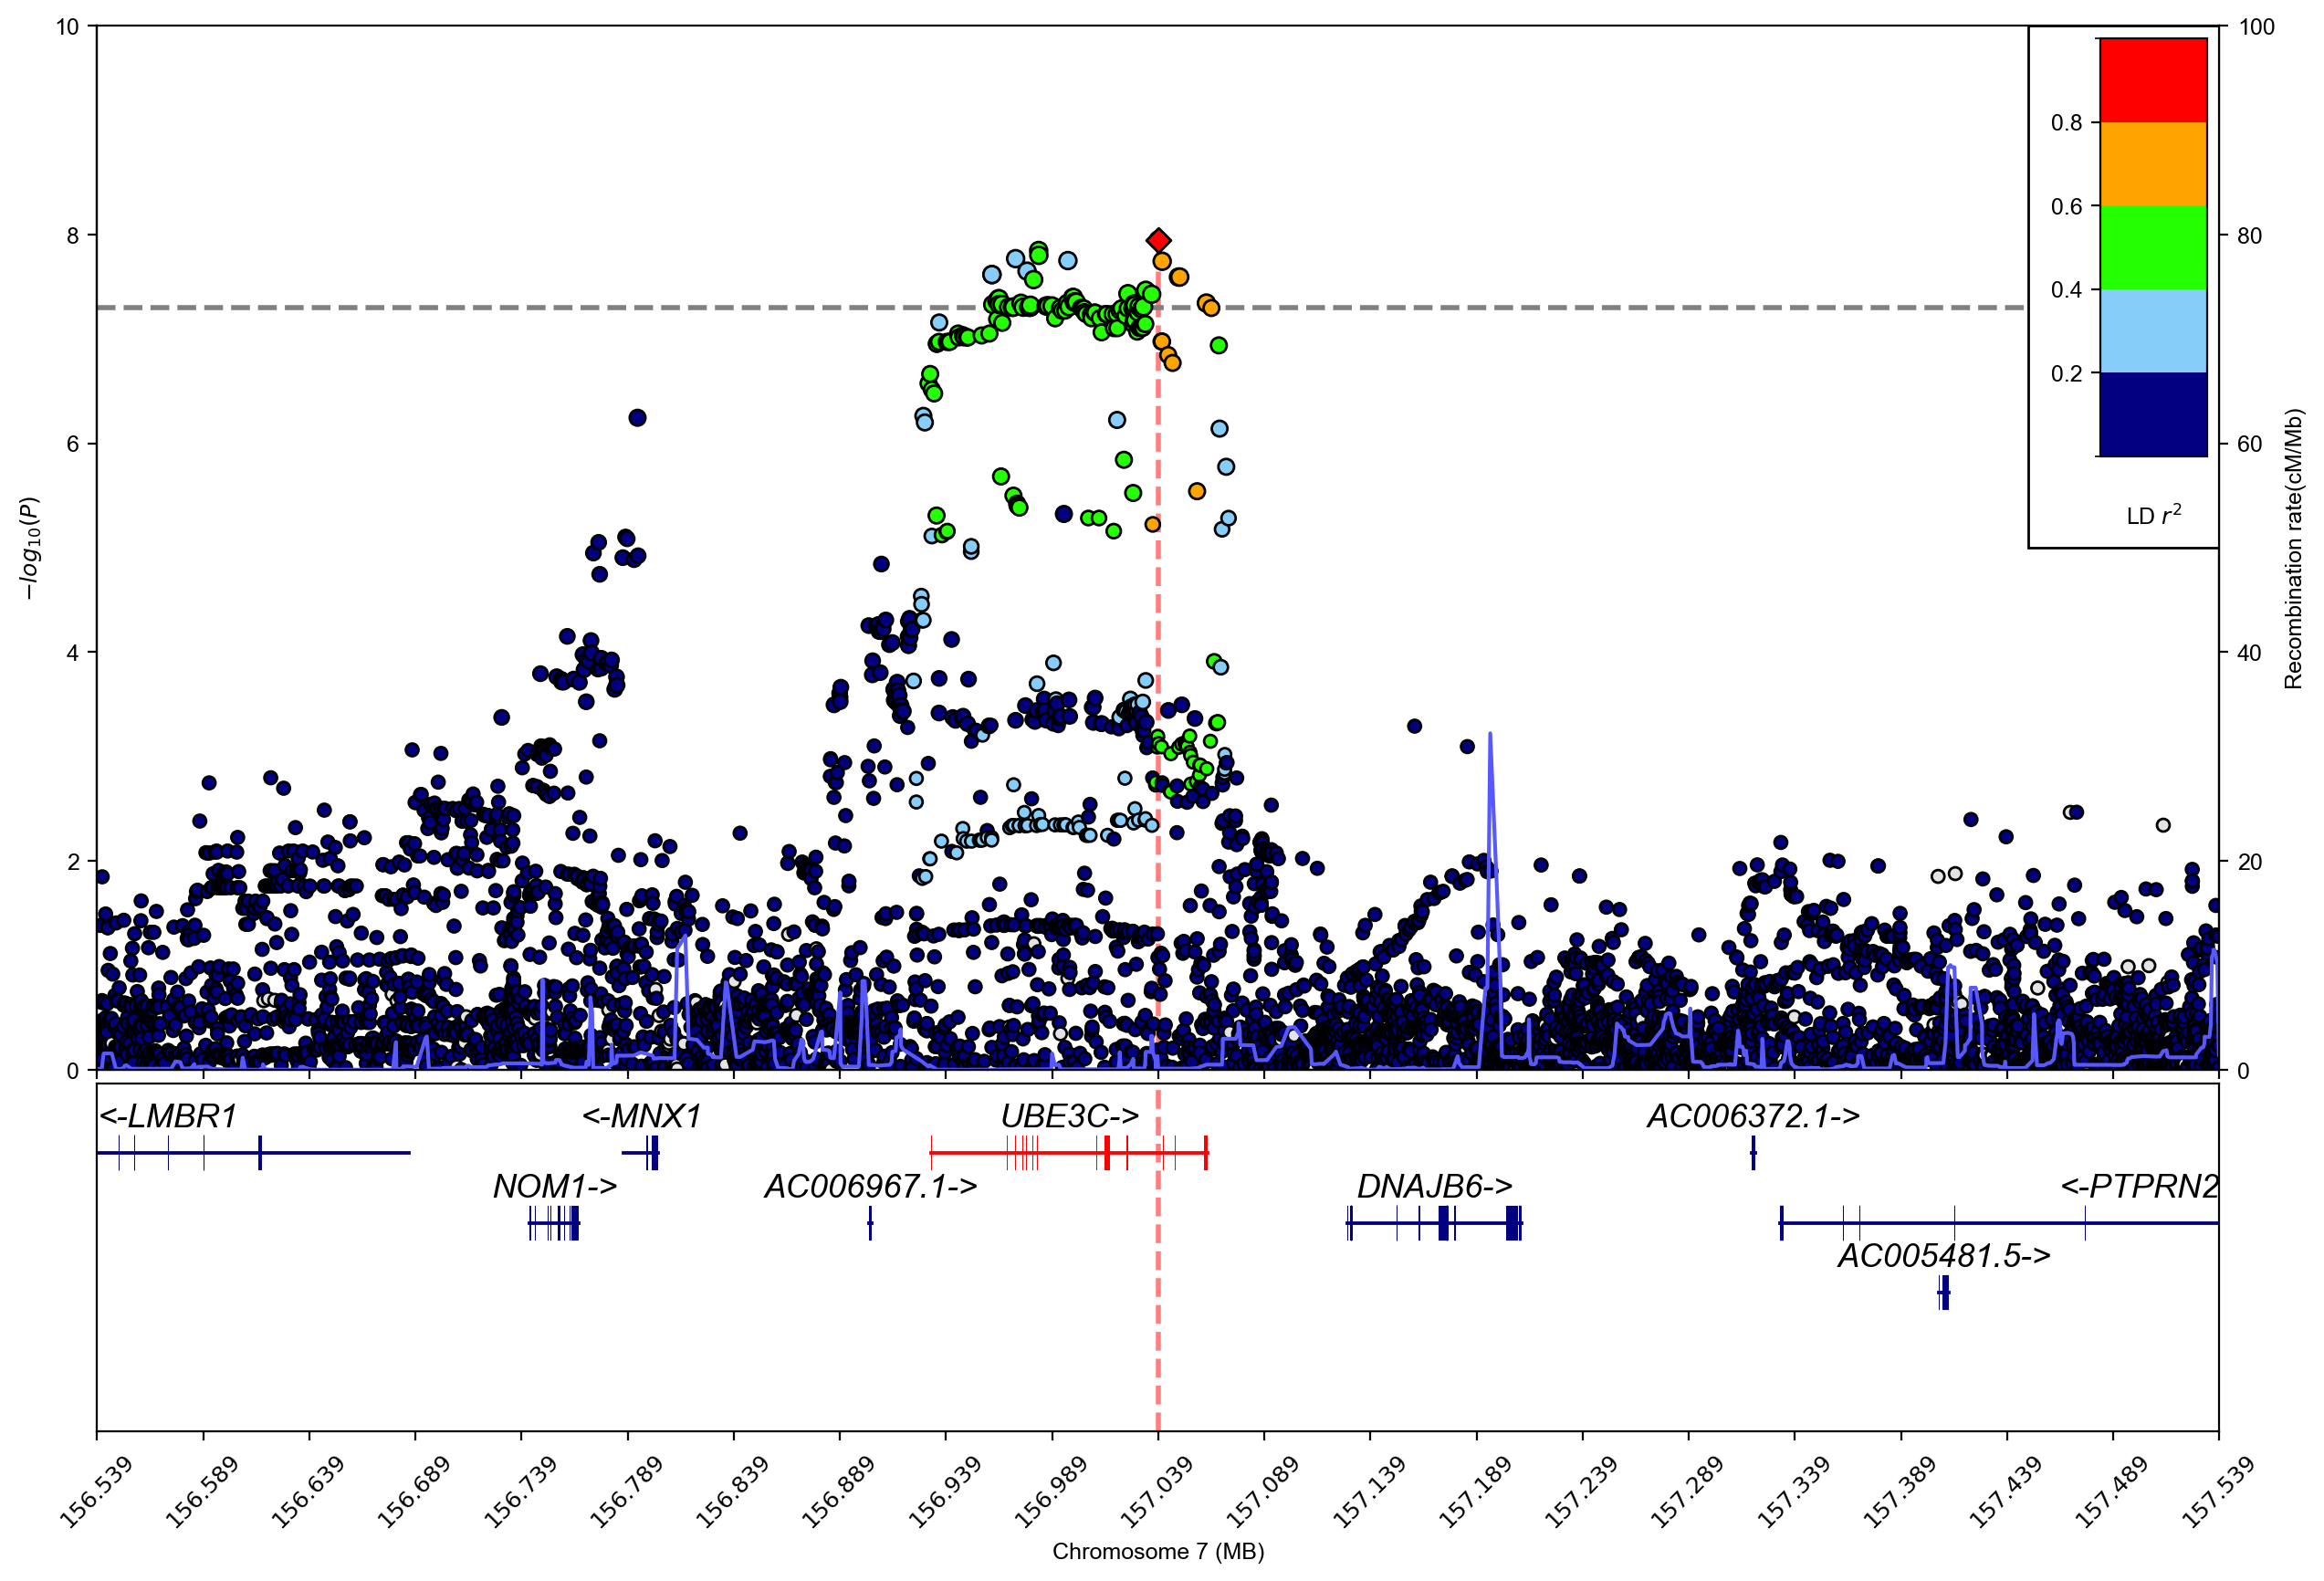

In [8]:
mysumstats.plot_mqq(mode="r",
                    region=(7,156538803,157538803),                    
                    vcf_path=gl.get_path("1kg_eas_hg19")
                   )

## Create regional plot with two reference variants

In [9]:
mysumstats.filter_flanking_by_chrpos([(7,156738803)],windowsizekb=100).get_lead(sig_level=1e-5)

Fri Feb  2 17:22:22 2024 Start to extract variants in the flanking regions using CHR and POS...
Fri Feb  2 17:22:22 2024  - Central positions: [(7, 156738803)]
Fri Feb  2 17:22:22 2024  - Flanking windowsize in kb: 100
Fri Feb  2 17:22:22 2024  - Variants in flanking region 7:156638803-156838803 : 1119
Fri Feb  2 17:22:22 2024  - Extracted 1119 variants in the regions.
Fri Feb  2 17:22:22 2024 Finished extracting variants in the flanking regions.
Fri Feb  2 17:22:22 2024 Start to extract lead variants...v3.4.38
Fri Feb  2 17:22:22 2024  -Current Dataframe shape : 1119 x 12 ; Memory usage: 20.64 MB
Fri Feb  2 17:22:22 2024  -Processing 1119 variants...
Fri Feb  2 17:22:22 2024  -Significance threshold : 1e-05
Fri Feb  2 17:22:22 2024  -Sliding window size: 500  kb
Fri Feb  2 17:22:22 2024  -Using P for extracting lead variants...
Fri Feb  2 17:22:22 2024  -Found 4 significant variants in total...
Fri Feb  2 17:22:22 2024  -Identified 1 lead variants!
Fri Feb  2 17:22:22 2024 Finished ex

SNPID  CHR        POS  EA NEA     EAF    BETA      SE  \
694190  7:156793450_G_GA    7  156793450  GA   G  0.1168  0.0838  0.0167   

                   P       N DIRECTION   STATUS  
694190  5.686000e-07  191764      ++++  1960399

Fri Feb  2 17:22:22 2024 Start to create MQQ plot...v3.4.38:
Fri Feb  2 17:22:22 2024  -Genomic coordinates version: 19...
Fri Feb  2 17:22:22 2024  -Genome-wide significance level to plot is set to 5e-08 ...
Fri Feb  2 17:22:22 2024  -Raw input contains 707780 variants...
Fri Feb  2 17:22:22 2024  -MQQ plot layout mode is : r
Fri Feb  2 17:22:22 2024  -Region to plot : chr7:156538803-157538803.
Fri Feb  2 17:22:22 2024  -Checking prefix for chromosomes in vcf files...
Fri Feb  2 17:22:22 2024  -No prefix for chromosomes in the VCF files.
Fri Feb  2 17:22:22 2024  -Extract SNPs in region : chr7:156538803-157538803...
Fri Feb  2 17:22:23 2024  -Extract SNPs in specified regions: 5831
Fri Feb  2 17:22:23 2024 Finished loading specified columns from the sumstats.
Fri Feb  2 17:22:23 2024 Start data conversion and sanity check:
Fri Feb  2 17:22:23 2024  -Removed 0 variants with nan in CHR or POS column ...
Fri Feb  2 17:22:23 2024  -Removed 0 variants with CHR <=0...
Fri Feb  2 17:22:23 20

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


Fri Feb  2 17:22:53 2024  -plotting gene track..
Fri Feb  2 17:22:53 2024  -Finished plotting gene track..
Fri Feb  2 17:22:53 2024 Finished creating MQQ plot successfully!
Fri Feb  2 17:22:53 2024 Start to extract variants for annotation...
Fri Feb  2 17:22:53 2024  -Found 2 specified variants to annotate...
Fri Feb  2 17:22:53 2024 Finished extracting variants for annotation...
Fri Feb  2 17:22:53 2024 Start to process figure arts.
Fri Feb  2 17:22:53 2024  -Processing X labels...
Fri Feb  2 17:22:53 2024  -Processing Y labels...
Fri Feb  2 17:22:53 2024  -Processing Y tick lables...
Fri Feb  2 17:22:53 2024  -Processing Y labels...
Fri Feb  2 17:22:53 2024  -Processing color bar...
Fri Feb  2 17:22:53 2024  -Processing lines...
Fri Feb  2 17:22:53 2024 Finished processing figure arts.
Fri Feb  2 17:22:53 2024 Start to annotate variants...
Fri Feb  2 17:22:53 2024  -Annotating using column CHR:POS...
Fri Feb  2 17:22:53 2024  -Adjusting text positions with repel_force=0.03...
Fri Feb

(<Figure size 3000x2000 with 5 Axes>, <gwaslab.g_Log.Log at 0x7fd43c674190>)

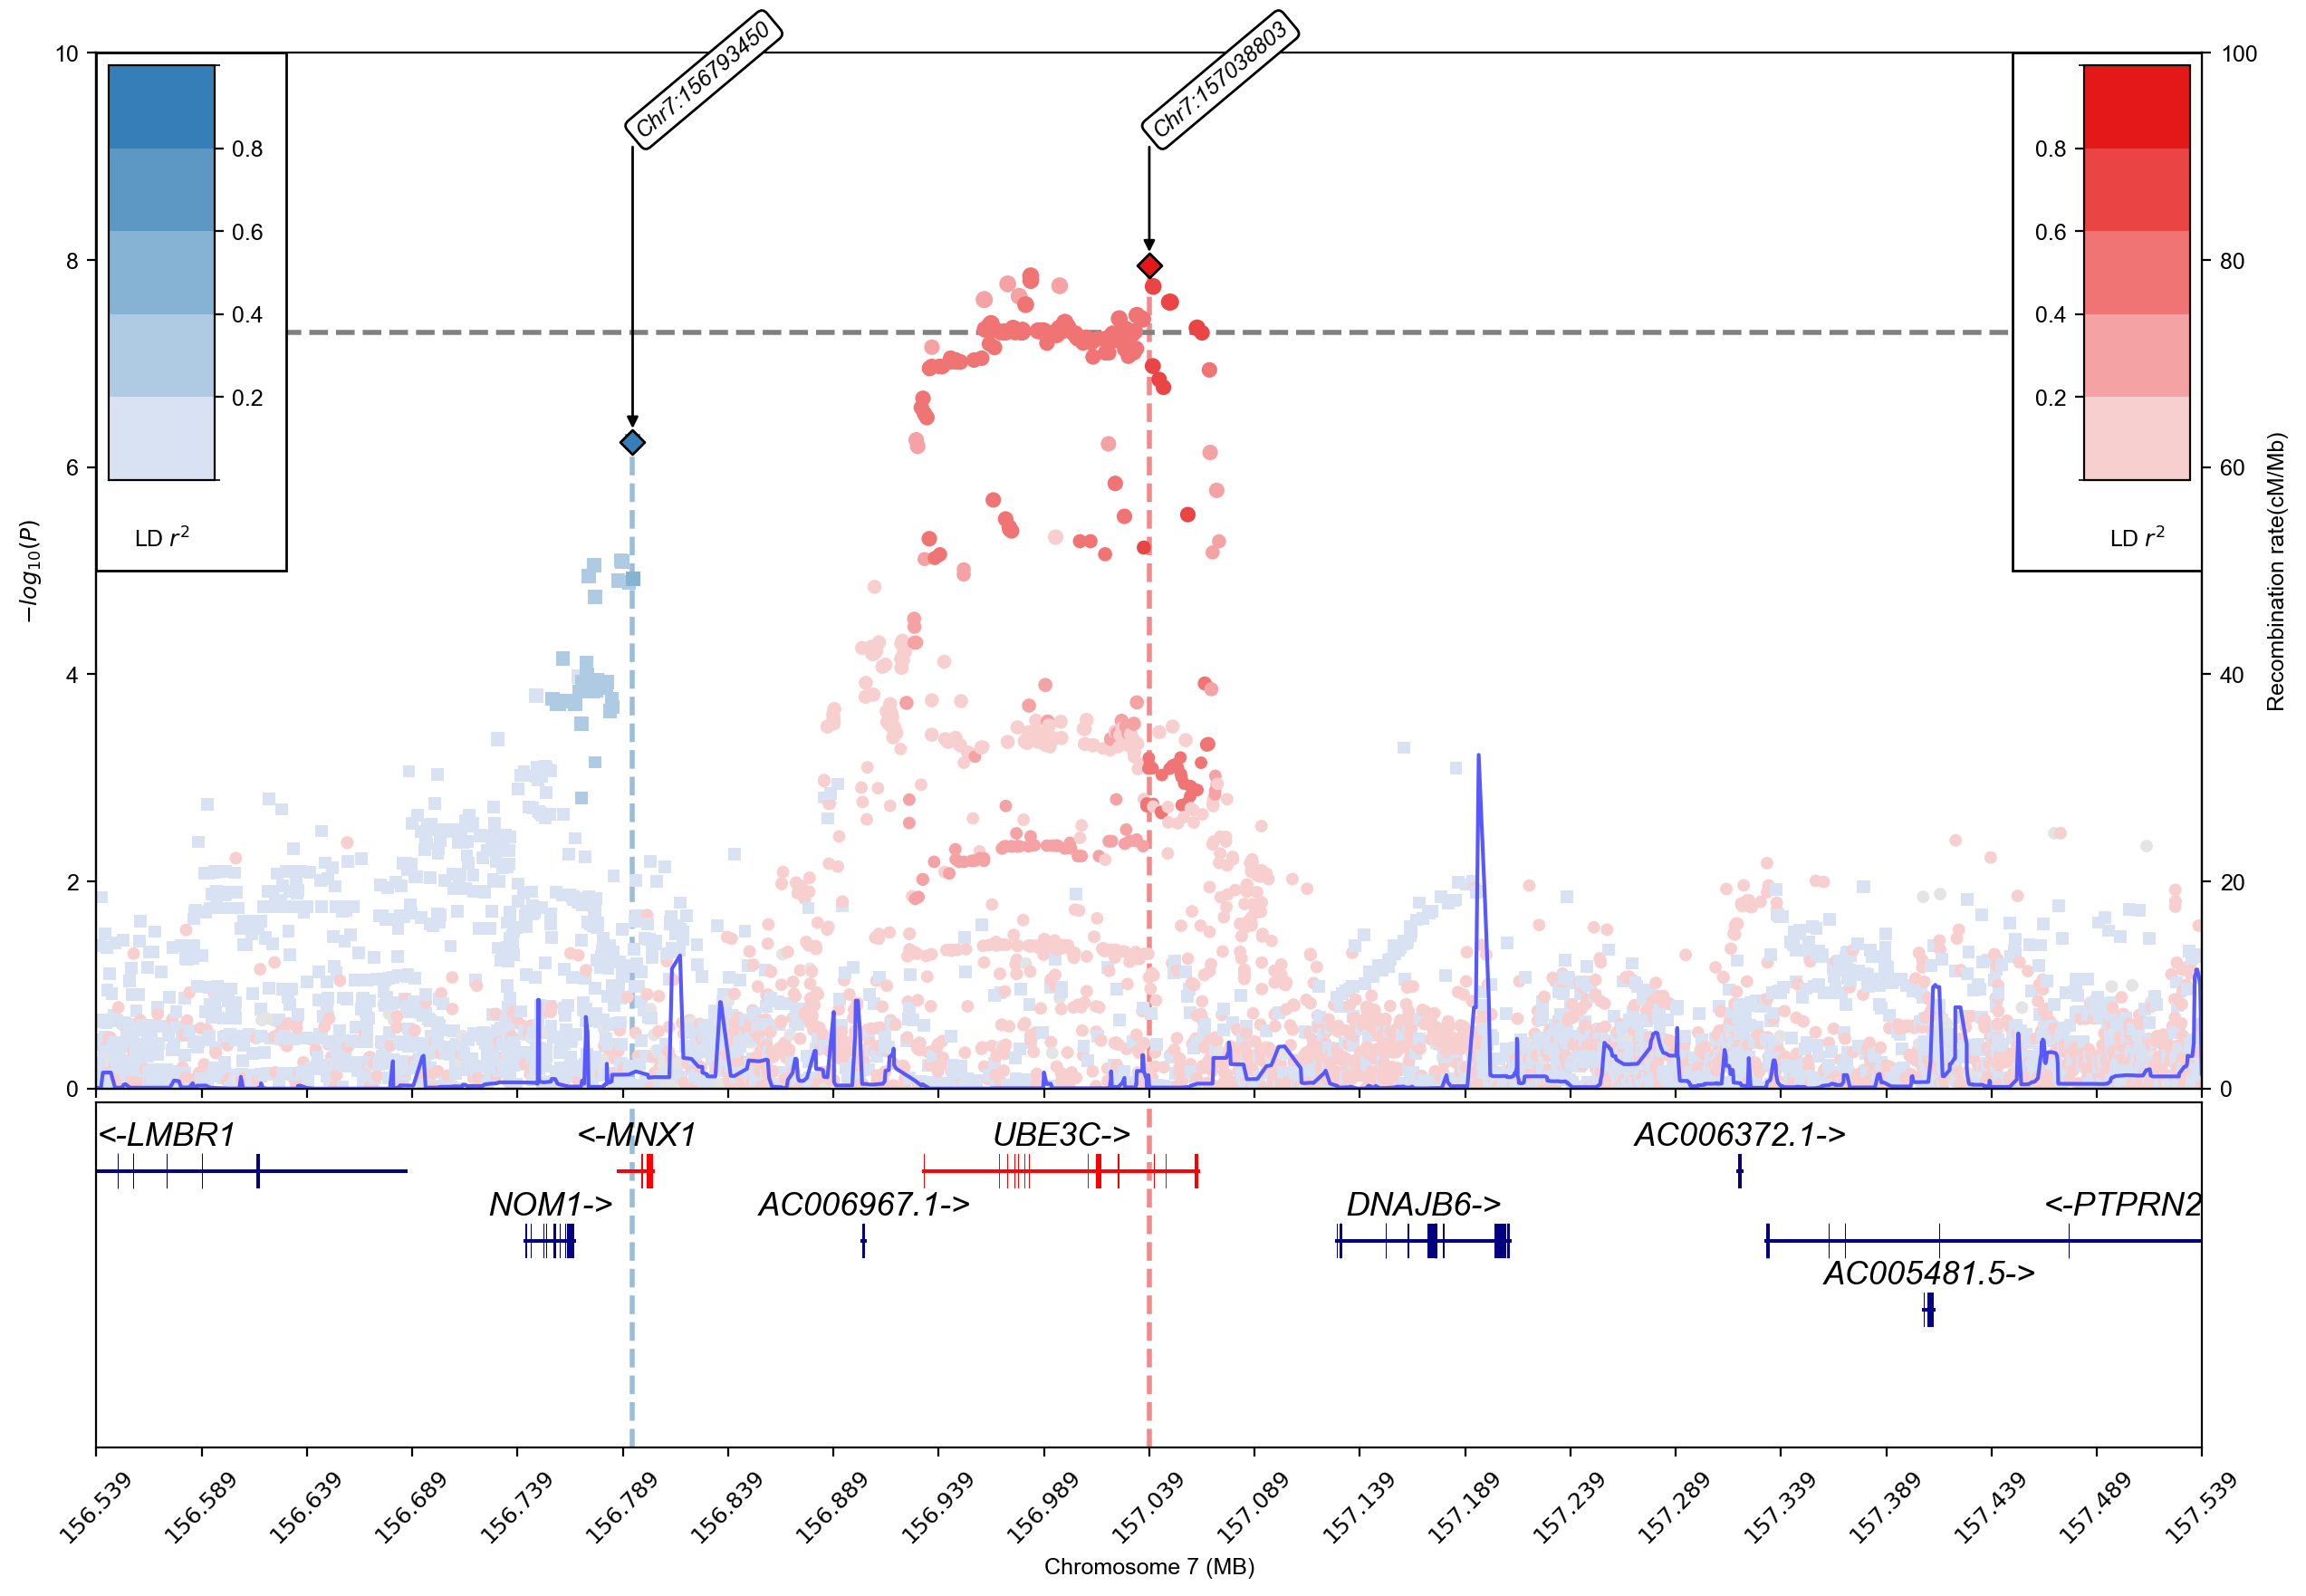

In [10]:
mysumstats.plot_mqq(mode="r",
                    region=(7,156538803,157538803),      
                    region_ref2 = "7:156793450_G_GA", 
                    vcf_path=gl.get_path("1kg_eas_hg19"),
                    anno=True,
                    anno_set=["7:156793450_G_GA","7:157038803_A_G"]
                   )

In [14]:
## Create stacked regional plot

Fri Feb  2 17:32:40 2024 Start to create stacked mqq plot by iteratively calling plot_mqq:
Fri Feb  2 17:32:40 2024 Start to create MQQ plot...v3.4.38:
Fri Feb  2 17:32:40 2024  -Genomic coordinates version: 19...
Fri Feb  2 17:32:40 2024  -Genome-wide significance level to plot is set to 5e-08 ...
Fri Feb  2 17:32:40 2024  -Raw input contains 707780 variants...
Fri Feb  2 17:32:40 2024  -MQQ plot layout mode is : r
Fri Feb  2 17:32:40 2024  -Region to plot : chr7:156538803-157538803.
Fri Feb  2 17:32:40 2024  -Checking prefix for chromosomes in vcf files...
Fri Feb  2 17:32:40 2024  -No prefix for chromosomes in the VCF files.
Fri Feb  2 17:32:40 2024  -Extract SNPs in region : chr7:156538803-157538803...
Fri Feb  2 17:32:40 2024  -Extract SNPs in specified regions: 5831
Fri Feb  2 17:32:40 2024 Finished loading specified columns from the sumstats.
Fri Feb  2 17:32:40 2024 Start data conversion and sanity check:
Fri Feb  2 17:32:40 2024  -Sanity check will be skipped.
Fri Feb  2 17:32

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


Fri Feb  2 17:33:12 2024  -plotting gene track..
Fri Feb  2 17:33:12 2024  -Finished plotting gene track..
Fri Feb  2 17:33:13 2024 Finished creating MQQ plot successfully!
Fri Feb  2 17:33:13 2024 Start to extract variants for annotation...
Fri Feb  2 17:33:13 2024  -Found 2 specified variants to annotate...
Fri Feb  2 17:33:13 2024 Finished extracting variants for annotation...
Fri Feb  2 17:33:13 2024 Start to process figure arts.
Fri Feb  2 17:33:13 2024  -Processing X labels...
Fri Feb  2 17:33:13 2024  -Processing Y labels...
Fri Feb  2 17:33:13 2024  -Processing Y tick lables...
Fri Feb  2 17:33:13 2024  -Processing Y labels...
Fri Feb  2 17:33:13 2024  -Processing color bar...
Fri Feb  2 17:33:13 2024  -Processing lines...
Fri Feb  2 17:33:13 2024 Finished processing figure arts.
Fri Feb  2 17:33:13 2024 Start to annotate variants...
Fri Feb  2 17:33:13 2024  -Annotating using column CHR:POS...
Fri Feb  2 17:33:13 2024  -Adjusting text positions with repel_force=0.03...
Fri Feb

(<Figure size 3200x2400 with 6 Axes>, <gwaslab.g_Log.Log at 0x7fd4394ed490>)

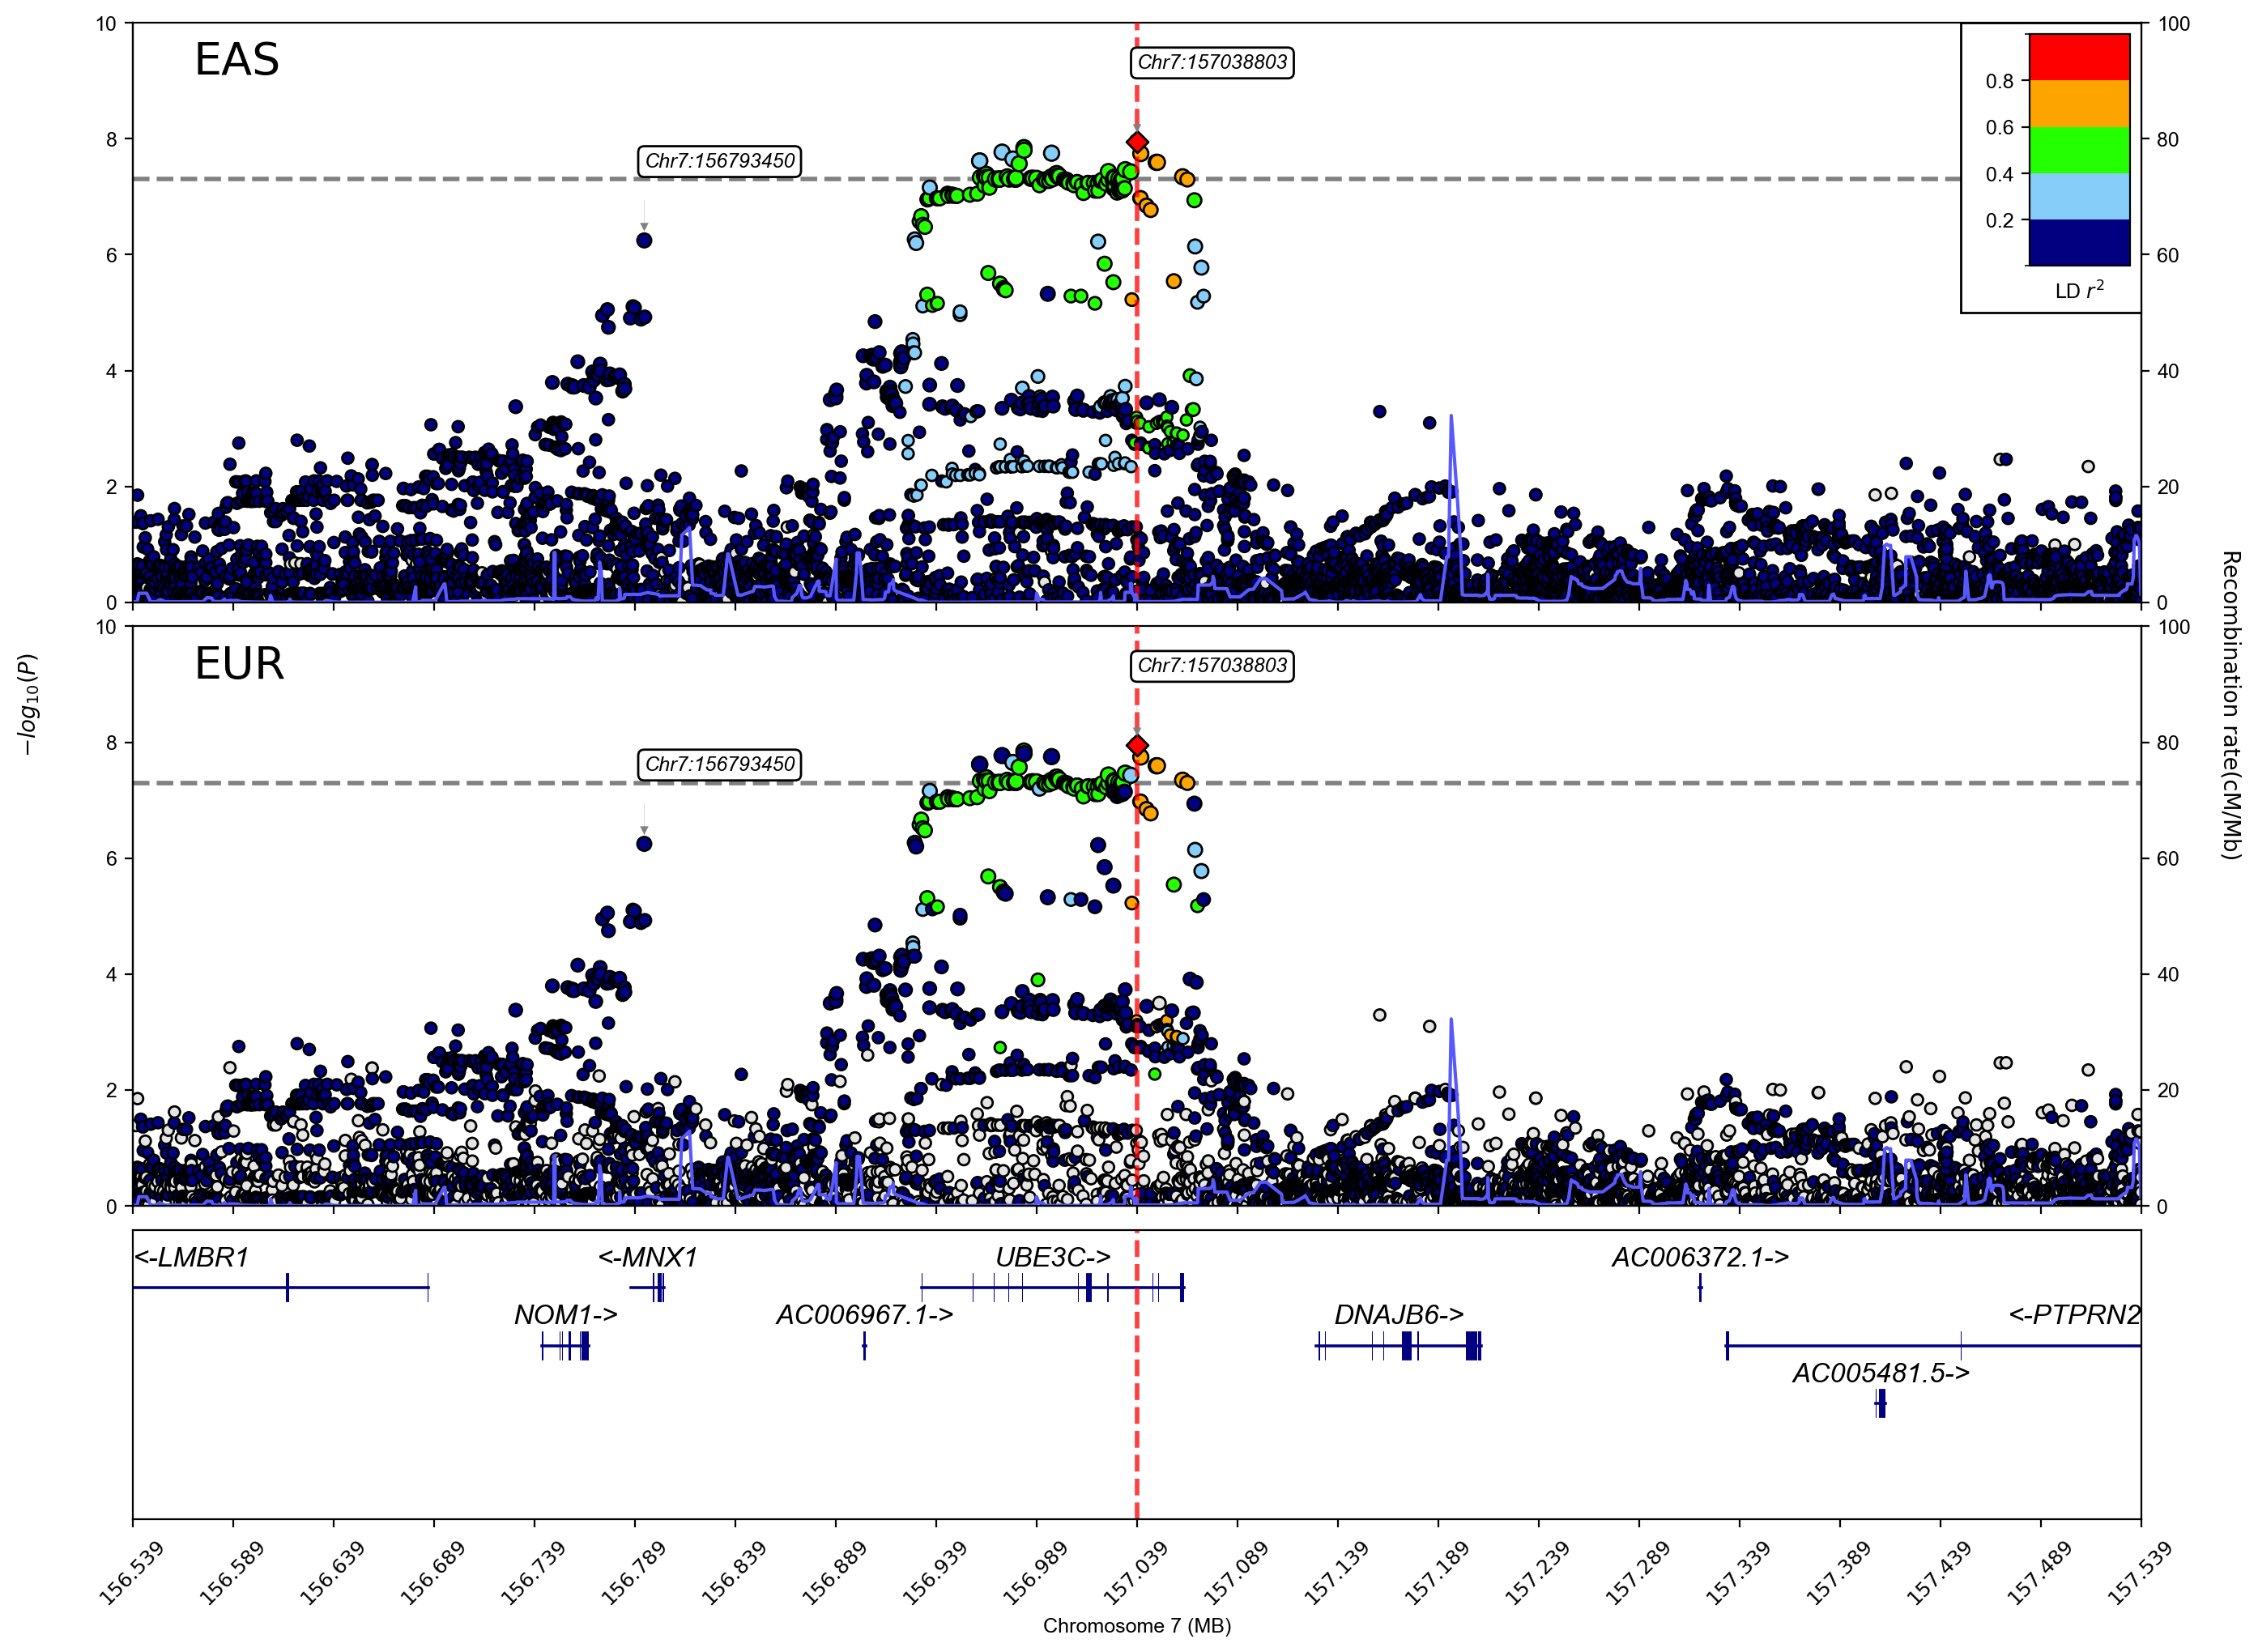

In [13]:
gl.plot_stacked_mqq(objects=[mysumstats,mysumstats],
                    vcfs=[gl.get_path("1kg_eas_hg19"),gl.get_path("1kg_eur_hg19")],
                    region=(7,156538803,157538803), 
                    mode="r",
                    build="19",
                    anno=True,
                    anno_style="tight",
                    anno_set=["7:156793450_G_GA","7:157038803_A_G"],
                    titles=["EAS","EUR"],
                    title_args={"size":20},
                    anno_args={"rotation":0})